In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

### Data size
data = {'sizes': []}
with open("/home/mouren/Data/article_repo_data/STARR-seq_experiment/STARR_AllSequences.tsv") as file:
    for line in file:   
        if "EE" in line.strip().split()[0] and "SNP" not in line.strip().split()[0]:
            data["sizes"].append(int(line.strip().split()[4])-int(line.strip().split()[3]))

df = pd.DataFrame(data)

# Calculate the number of bins based on increments of 10 values
data_range = df['sizes'].max() - df['sizes'].min()
num_bins = int(data_range / 10) + 1

### Data input and standard deviation
df2 = pd.read_csv("/home/mouren/Data/valid_exp/summary_count_exonhancers_bilan.tsv", sep="\t", header=0)
df2['Input_STD'] = df2['Input_STD'].str.replace(',', '.').astype(float)
df2 = df2[~df2['Log2FC'].str.contains('#', na=False)]
df2['Log2FC'] = df2['Log2FC'].str.replace(',', '.').astype(float)


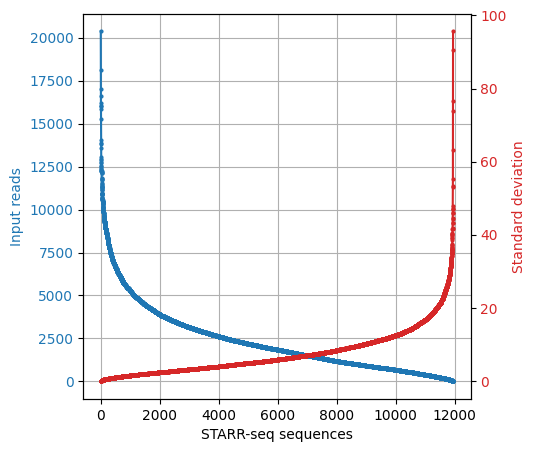

In [2]:
# Sort by count_sequence_AVO4Exonhmaxi4 (descending)
df2_sorted_count = df2.sort_values(by='count_sequence_AVO4Exonhmaxi4', ascending=False).reset_index(drop=True)

# Sort by Input_STD (ascending)
df2_sorted_std = df2.sort_values(by='Input_STD', ascending=True).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(5, 5))

# Plot for count_sequence_AVO4Exonhmaxi4 (left y-axis)
color1 = 'tab:blue'
ax1.set_xlabel('STARR-seq sequences')
ax1.set_ylabel('count_sequence_AVO4Exonhmaxi4', color=color1)
line1 = ax1.plot(
    df2_sorted_count['count_sequence_AVO4Exonhmaxi4'], 
    marker='o', 
    markersize=2, 
    color=color1, 
    label='count_sequence_AVO4Exonhmaxi4'
)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)
plt.ylabel("Input reads")

# Create a twin y-axis for Input_STD (right y-axis)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Input_STD', color=color2)
line2 = ax2.plot(
    df2_sorted_std['Input_STD'], 
    marker='o', 
    markersize=2, 
    color=color2, 
    label='Input_STD'
)
ax2.tick_params(axis='y', labelcolor=color2)

plt.ylabel("Standard deviation")

# Combine legends
lines = line1 + line2
labels = [line.get_label() for line in lines]

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/starr_input_reads_std.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/starr_input_reads_std.png", format="png", bbox_inches="tight", dpi=450)


plt.show()


/home/mouren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


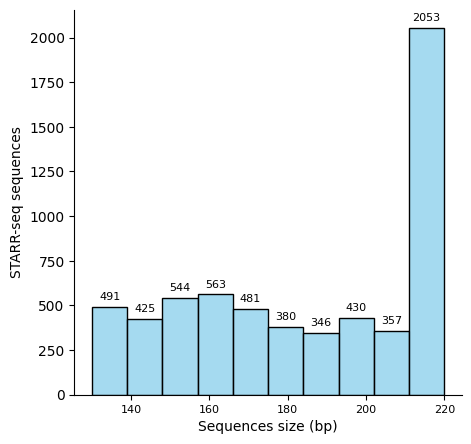

In [4]:
# Plotting the distribution using seaborn and matplotlib
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['sizes'], kde=False, color='skyblue', bins=num_bins)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 5), textcoords='offset points', size=8) # rotation=90, size=5)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20)) #gca() et pour retrouver les axes du plot si on a direct plotter sans les def
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(fontsize=8 )

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Sequences size (bp)')
plt.ylabel('STARR-seq sequences')

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/starr_sequences_sizes.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/starr_sequences_sizes.png", format="png", bbox_inches="tight", dpi=450)

plt.show()